In [1]:
import io
import pandas as pd
from datetime import datetime
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# from matplotlib.figure import Figure
import base64
import quandl
from yahoo_fin.stock_info import get_data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [17]:
def randomForest_plot(data, model_target='SalePrice'):
#     model_set = {
#                 "Baker Hughes": "baker_close", "Chevron": "chevron_close", "Conoco Philis": "conoco_close",
#                 "Exxon Mobile": "exxon_close", "EOG resources": "eog_close", "Valero energy": "valero_close"
#                 }
    model = list(data.columns)
    remove_list = ['Id',  'LotFrontage', 'MasVnrArea', 'GarageYrBlt', model_target]
    model_x = [feature for feature in model if feature not in remove_list]
    print(model_x)
#     model_x.remove(['Id', model_target])
    
#     model_x.append('WTI')

#     target_scaled = model_target+'_scaled'
#     oil_data = stocks_data(startdate, enddate)
#     oil_data.index = pd.to_datetime(oil_data.index).date

#     conditions = [
#     (oil_data.index <= middate),
#     (oil_data.index > middate)
#     ]
#     values = ['train', 'test']
#     oil_data['SPLIT'] = np.select(conditions, values)
#     oil_train = oil_data[oil_data['SPLIT'] == 'train']
#     oil_test = oil_data[oil_data['SPLIT'] == 'test']

    X = data[model_x]
    y = data[model_target].values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    print(model_target)

    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    regressor = RandomForestRegressor(n_estimators=200, max_depth=5 )

    # Train data
    clf=regressor.fit(X_train, y_train)

    # Predict
    y_pred=regressor.predict(X_test)
    y_pred=pd.DataFrame(y_pred)

    fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(11, 8))  # create figure & 1 axis

    plt_train = ax.scatter(X_train["OverallQual"],y_train,   color='grey')
    plt_pred = ax.scatter(data["OverallQual"], regressor.predict(data[model_x]),  color='black')
    plt_test = ax.scatter(X_test["OverallQual"],y_test,   color='green')

    ax.set_xlabel("OverallQual")
    ax.set_ylabel(model_target + ' share price')
    ax.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
    plt.show()

    MSE_train = np.mean((regressor.predict(X_train) - y_train) ** 2)
    MSE_test = np.mean((regressor.predict(X_test) - y_test) ** 2)


    model_dict = { "MSE train": MSE_train, 
                    "MSE test": MSE_test}

    importances=regressor.feature_importances_
    indices=list(X_train)

    for f in range(X_train.shape[1]):
        model_dict.update({indices[f] : importances[f]})

#     # save your figure into a bytes object to expose it via flask
#     bytes_image = io.BytesIO()
#     FigureCanvas(fig).print_png(bytes_image)

#     # Encode PNG image to base64 string
#     pngImageB64String = "data:image/png;base64,"
#     pngImageB64String += base64.b64encode(bytes_image.getvalue()).decode('utf8')

    return sorted(model_dict.items(), key=lambda x: x[1], reverse=True)


In [3]:
# Load clean data for analysis
house_train_data = pd.read_csv('data/train.csv')
house_test_data = pd.read_csv('data/test.csv')

In [4]:
col_type = house_train_data.dtypes.to_list()
col_name = house_train_data.columns.to_list()
col_dict = dict(zip(col_name, col_type))

In [5]:
house_test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
col_dict.keys()

dict_keys(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'

In [7]:
cat_col = {}
for i in col_name:
    if col_dict[i] == 'O':
        cat_col.update({i: house_train_data[i].unique()})
        house_train_data[i]= house_train_data[i].astype('category')
        house_train_data[i] = house_train_data[i].cat.codes
#         house_train_data[i] = pd.factorize(list(house_train_data[i]))[0]

In [8]:
cat_col

{'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 'Street': array(['Pave', 'Grvl'], dtype=object),
 'Alley': array([nan, 'Grvl', 'Pave'], dtype=object),
 'LotShape': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object),
 'LandContour': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object),
 'Utilities': array(['AllPub', 'NoSeWa'], dtype=object),
 'LotConfig': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 'Neighborhood': array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
        'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
        'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
        'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
        'Blueste'], dtype=object),
 'Condition1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
        'RRNe'], dtype=object),
 'Condition2': array(['Norm', 'Artery'

In [9]:
house_train_data['Alley'].unique()

array([-1,  0,  1], dtype=int8)

In [10]:
house_train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,-1,3,3,0,...,0,-1,-1,-1,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,-1,3,3,0,...,0,-1,2,-1,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,-1,3,3,0,...,0,-1,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,-1,3,3,0,...,0,-1,-1,-1,0,4,2010,8,4,142125


In [11]:
# house_train_data[house_train_data.isnull().any(1)]
house_train_data.loc[:, house_train_data.isnull().any()].columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'Yr

<ipython-input-17-4503ed42d1ff>:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf=regressor.fit(X_train, y_train)


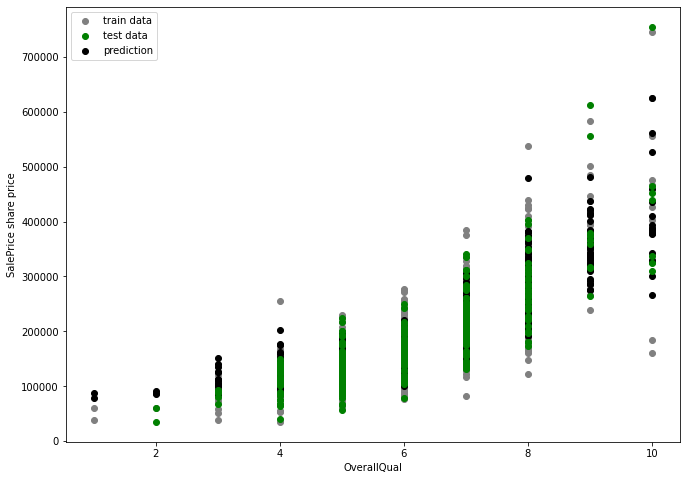

[('MSE test', 11790327916.511822),
 ('MSE train', 10646421848.468634),
 ('OverallQual', 0.6173752219689047),
 ('GrLivArea', 0.13042432631164935),
 ('TotalBsmtSF', 0.028934537715077077),
 ('2ndFlrSF', 0.02862456020279229),
 ('1stFlrSF', 0.0280475625073692),
 ('BsmtFinSF1', 0.024307221572821856),
 ('GarageCars', 0.02426987928867555),
 ('YearBuilt', 0.011930644587384654),
 ('GarageArea', 0.011633977070575934),
 ('LotArea', 0.010063508111231467),
 ('BsmtQual', 0.009752284300887478),
 ('Neighborhood', 0.007774502129385336),
 ('TotRmsAbvGrd', 0.00769484803981395),
 ('FullBath', 0.005660020648508387),
 ('ScreenPorch', 0.003625043380271856),
 ('KitchenQual', 0.003550539008324767),
 ('OpenPorchSF', 0.0035123635130003077),
 ('YearRemodAdd', 0.003355695926721166),
 ('GarageType', 0.002947452648656005),
 ('Fireplaces', 0.002595809871393369),
 ('WoodDeckSF', 0.0024134832483755073),
 ('ExterQual', 0.002319772913147394),
 ('BsmtExposure', 0.001979931171155452),
 ('FireplaceQu', 0.0017997937744386096)

In [18]:
randomForest_plot(house_train_data)